# Data Analysis (Classification): K-Nearest Neighbors (K-NN)
K-Nearest Neighbors performs classification by identifying data points separated into classess to predict the classification of a new data point based on similarity measure.

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the X and y Data
X = pd.read_csv('Project/Cleaned/Classification/X.csv', na_values = ['..'])
y = pd.read_csv('Project/Cleaned/Classification/y.csv', na_values = ['..'])
X_train = pd.read_csv('Project/Cleaned/Classification/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Classification/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Classification/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Classification/y_test.csv', na_values = ['..'])

# Drop Column
X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load Dictionary
dictionary_series = np.load('Project/Cleaned/dictionary_series.npy',allow_pickle='TRUE').item()

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## K-Nearest Neighbors

In [5]:
# Create and Train Model
model_knn = KNeighborsClassifier().fit(X_train,y_train.values.ravel())

# Model Prediction
y_prediction = model_knn.predict(X_test)

# Model Results
model_results = [['Score', model_knn.score(X_train, y_train)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_knn = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_knn

,Evaluation Metric,Value
0,Score,0.969697
1,Accuracy,0.958959


## Cross-Validation

In [6]:
# Optimal Value for n_neighbors
knn_neighbors = list(range(1, 50, 2))

kfold_cv_scores = []

# perform 10-fold cross validation
for n in knn_neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(model_knn, X, y.values.ravel(), cv=10, scoring='accuracy')
    kfold_cv_scores.append(scores.mean())
    
# Cross Validation Scores
print("Cross Validation Scores Max:    {}".format(np.max(kfold_cv_scores)))
print("Optimal Value for n_neighbors: ", kfold_cv_scores.index((np.max(kfold_cv_scores))))
model_cross_validation_scores_n_neighbors_table = pd.DataFrame(kfold_cv_scores, range(1,26), columns=['Score'])
model_cross_validation_scores_n_neighbors_table

Cross Validation Scores Max:    0.8689931863727456
Optimal Value for n_neighbors:  24


,Score
1,0.793273
2,0.809691
3,0.843147
4,0.851958
5,0.859369
6,0.859970
7,0.859371
8,0.858772
9,0.858770
10,0.859773


Text(0, 0.5, 'Accuracy')

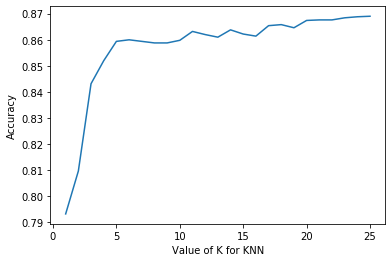

In [7]:
# Accuracy vs k
plt.plot(range(1,26), kfold_cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

Optimal Number of Neighbors: 49


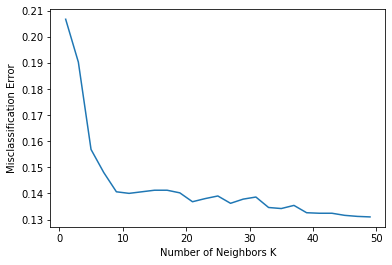

In [8]:
# Misclassification Error
mse = [1 - x for x in kfold_cv_scores]

# Optimal Value for k
optimal_k = knn_neighbors[mse.index(min(mse))]
print("Optimal Number of Neighbors: {}".format(optimal_k))

# Misclassification Error vs k
plt.plot(knn_neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

## Hyperparameter Tuning 

In [ ]:
# Grid Search
model_knn = KNeighborsClassifier()

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

param_grid = dict(leaf_size=leaf_size,
                  n_neighbors=n_neighbors,
                  p=p)

grid = GridSearchCV(estimator=model_knn, param_grid=param_grid, scoring='roc_auc')
grid_result = grid.fit(X_train, y_train.values.ravel())

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9678967211191043
Best Params:  {'leaf_size': 25, 'n_neighbors': 3, 'p': 1}


## K-Nearest Neighbor with Grid Search Parameters

In [10]:
# Create and Train Model
model_knn = KNeighborsClassifier(n_neighbors = 3, leaf_size = 25, p = 1).fit(X_train,y_train.values.ravel())

# Model Prediction
y_prediction = model_knn.predict(X_test)

# Model Results
model_results = [['Score', model_knn.score(X_train, y_train.values.ravel())],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_knn = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_knn

,Evaluation Metric,Value
0,Score,0.982970
1,Accuracy,0.963964


## Cross-Validation

In [11]:
# Model Scores
model_scores = cross_val_score(model_knn, X, y.values.ravel(), cv=5)

print("Accuracy: %0.2f (+/- % 0.2f)" % (model_scores.mean(), model_scores.std() * 2))
print("CV Scores: ", model_scores)

Accuracy: 0.83 (+/-  0.05)
CV Scores:  [0.84384384 0.7997998  0.85571142 0.85170341 0.79258517]


## Evaluating Model

In [12]:
# Classification Report
classification_report_knn_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_knn_table = pd.DataFrame(classification_report_knn_table).transpose()
classification_report_knn_table

,precision,recall,f1-score,support
0,0.965278,0.984419,0.974755,706.000000
1,0.960573,0.914676,0.937063,293.000000
accuracy,0.963964,0.963964,0.963964,0.963964
macro avg,0.962926,0.949548,0.955909,999.000000
weighted avg,0.963898,0.963964,0.963700,999.000000


In [13]:
# Confusion Matrix
model_confusion_matrix_knn = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_knn

array([[695,  11],
       [ 25, 268]])

Text(0.5, 257.44, 'Predicted label')

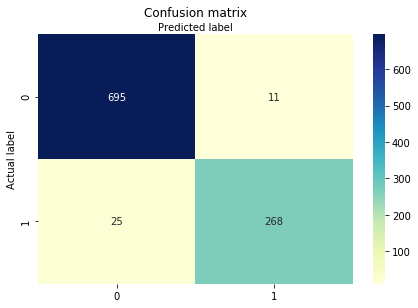

In [14]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_knn))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

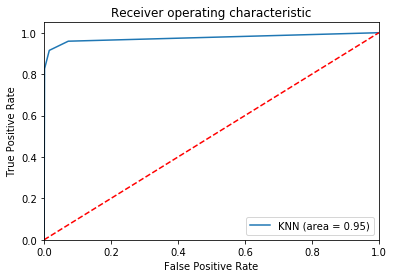

In [15]:
# ROC Curve
roc_auc_knn = roc_auc_score(y_test, model_knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()